In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import pickle 
import joblib
import re
import spacy
import statistics
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 100000)
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from collections import Counter

In [2]:
# READ DATA, GET SHAPE OF DATA
data_fit = pd.read_excel("fit_ no fit-2.xlsx", names=['title'], sheet_name='fit_publ')
data_no_fit = pd.read_excel("fit_ no fit-2.xlsx", names=['title'], sheet_name='no fit_publ')
print("data_fit has {} rows and {} columns".format(data_fit.shape[0], data_fit.shape[1]))
print("data_no_fit has {} rows and {} columns".format(data_no_fit.shape[0], data_no_fit.shape[1]))

data_fit has 4843 rows and 1 columns
data_no_fit has 15316 rows and 1 columns


In [3]:
#CHECK FOR MISSING VALUES
data_fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   4843 non-null   object
dtypes: object(1)
memory usage: 38.0+ KB


In [4]:
# CHECK FOR MISSING VALUES
data_no_fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15316 entries, 0 to 15315
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   15316 non-null  object
dtypes: object(1)
memory usage: 119.8+ KB


In [5]:
# CREATE NEW COLUMNS FOR TARGETS i.e 'fit' AND 'no fit'
data_fit['target'] = 'fit'
data_no_fit['target'] = 'no fit'

In [6]:
# COMBINE BOTH DATAFRAME FOR ANALYZING AND CONVERTING THE TEXT DATA INTO NUMERIC VALUES SO THAT A ML/DL MODEL CAN BE APPLIED 
combined_data = pd.concat([data_fit, data_no_fit], axis=0).reset_index().drop(['index'], axis=1)
print("combined_data has {} rows and {} columns".format(combined_data.shape[0], combined_data.shape[1]))

combined_data has 20159 rows and 2 columns


In [7]:
# NUMBER OF DUPLICATES
print("Number of duplicates: {}".format(sum(combined_data.duplicated(['title'], keep='first') == True)))
# REMOVE DUPLICATES
combined_data = combined_data.drop_duplicates(['title'], keep='first').reset_index().drop(['index'], axis=1)

Number of duplicates: 3584


In [8]:
# SAVE FILE INTO DIRECTORY
combined_data.to_csv('Data_Combined.csv', index=False)

In [26]:
# VIEW 50 ROWS FROM TOP
combined_data.head(50)

,title,target,processed
0,Striatin is a novel modulator of cell adhesion.,fit,striatin novel modulator cell adhesion
1,The cell-cell junctions of mammalian testes: II. The lamellar smooth muscle monolayer cells of the peritubular wall are laterally connected by vertical adherens junctions-a novel architectonic cell-cell junction system.,fit,cell cell junction mammalian testis ii lamellar smooth muscle monolayer cell peritubular wall laterally connect vertical adheren junctions novel architectonic cell cell junction system
2,Bacterial coexistence driven by motility and spatial competition.,fit,bacterial coexistence drive motility spatial competition
3,Publisher Correction: Processive extrusion of polypeptide loops by a Hsp100 disaggregase.,fit,publisher correction processive extrusion polypeptide loop hsp100 disaggregase
4,Processive extrusion of polypeptide loops by a Hsp100 disaggregase.,fit,processive extrusion polypeptide loop hsp100 disaggregase
5,The Anti-Aggregation Holdase Hsp33 Promotes the Formation of Folded Protein Structures.,fit,anti aggregation holdase hsp33 promote formation folded protein structures
6,Deciphering Metabolic Heterogeneity by Single-Cell Analysis.,fit,decipher metabolic heterogeneity single cell analysis
7,Apical constriction is necessary for crypt formation in small intestinal organoids.,fit,apical constriction necessary crypt formation small intestinal organoid
8,Long-term expanding human airway organoids for disease modeling.,fit,long term expand human airway organoid disease modeling
9,Size Laws and Division Ring Dynamics in Filamentous Escherichia coli cells.,fit,size laws division ring dynamics filamentous escherichia coli cell


In [27]:
# VIEW 50 ROWS FROM BOTTOM
combined_data.tail(50)

,title,target,processed
16525,Longitudinal changes in airway hyperresponsiveness and COPD mortality.,no fit,longitudinal change airway hyperresponsiveness copd mortality
16526,Novel Rare Genetic Variants Associated with Airflow Obstruction in the General Population.,no fit,novel rare genetic variant associate airflow obstruction general population
16527,Treatment-related mortality in children with cancer: Prevalence and risk factors.,no fit,treatment relate mortality child cancer prevalence risk factor
16528,Analysis of genetically driven alternative splicing identifies FBXO38 as a novel COPD susceptibility gene.,no fit,analysis genetically drive alternative splicing identify fbxo38 novel copd susceptibility gene
16529,Epigenome-wide association study of lung function level and its change.,no fit,epigenome wide association study lung function level change
16530,Pathway analysis of a genome-wide gene by air pollution interaction study in asthmatic children.,no fit,pathway analysis genome wide gene air pollution interaction study asthmatic child
16531,Early cerebral and intestinal oxygenation in the risk assessment of necrotizing enterocolitis in preterm infants.,no fit,early cerebral intestinal oxygenation risk assessment necrotize enterocolitis preterm infant
16532,Recurrence risk of preeclampsia in a linked population-based cohort: Effects of first pregnancy maximum diastolic blood pressure and gestational age.,no fit,recurrence risk preeclampsia link population base cohort effect pregnancy maximum diastolic blood pressure gestational age
16533,Genetic landscape of chronic obstructive pulmonary disease identifies heterogeneous cell-type and phenotype associations.,no fit,genetic landscape chronic obstructive pulmonary disease identify heterogeneous cell type phenotype association
16534,Genome-wide interaction study of gene-by-occupational exposures on respiratory symptoms.,no fit,genome wide interaction study gene occupational exposure respiratory symptom


In [9]:
# LOADING A PRE TRAINED SPACY MODEL. MD SPECIFIES MEDIUM.
nlp = spacy.load("en_core_web_md")
VE FROM STOPWORDS
nlp.vocab[u"I"].is_stop = False # REMOVE FROM STOPWORDS

In [10]:
processed= []
for i in tqdm.tqdm(range(len(combined_data))):
    # TOKENIZE TEXT USING SPACY
    doc = nlp(combined_data['title'][i])
    # REMOVE STOP WORDS, PUNCTUATION, CONVERT TO LOWER CASE AND LEMMATIZE TEXT
    txt = [re.sub('[^a-zA-Z0-9]', ' ',token.lemma_, flags=re.IGNORECASE).strip().lower() for token in doc if not token.is_stop and not token.is_punct]
    txt = ' '.join(txt) # NEW SENTACE WITH PROCESSED TEXT
    processed.append(txt) # APPEND THE PROCESSED TEXT TO LIST

combined_data['processed'] = processed
combined_data['processed'] = combined_data['processed'].str.replace('pron', 'i', case=False)
combined_data.to_excel('Processed.xlsx', index=False)
del i # FREE UP MEMORY

100%|██████████| 16575/16575 [03:12<00:00, 86.30it/s]


Text(0.5, 1.0, 'Count of FIT VS Count of NO FIT')

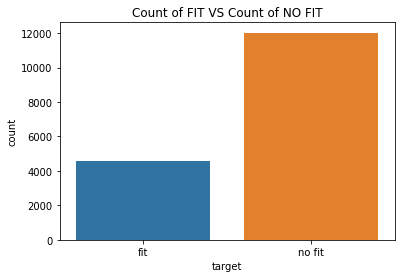

In [12]:
# We will now plot the count of number of fit and number of no fit
sns.countplot(combined_data['target']).set_title('Count of FIT VS Count of NO FIT')

In [12]:
#THE DATA IS HIGHLY IMBALANCED AND WE WOULD BE APPLYING A SAMPLING APPROACH
# NOW, LET US FIND THE AVERAGE TITLE LENGTH FOR BOTH CATEGORIES 
import statistics
a = round(statistics.mean(combined_data[combined_data['target'] == 'fit']['processed'].map(lambda x: len(x.split()))))
b = round(statistics.mean(combined_data[combined_data['target'] == 'no fit']['processed'].map(lambda x: len(x.split()))))
print("Average lenght of title for 'fit' category: {}".format(a))
print("Average lenght of title for 'no fit' category: {}".format(b))
del a,b

Average lenght of title for 'fit' category: 11
Average lenght of title for 'no fit' category: 11


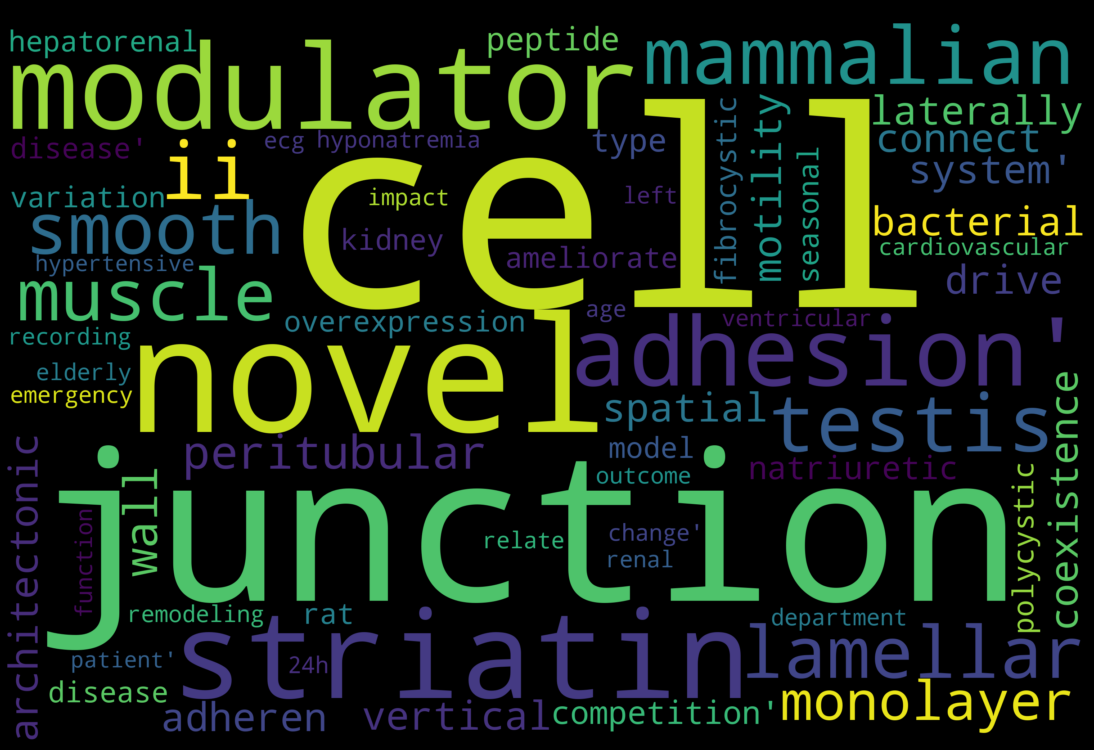

In [15]:
# WORDCLOUD FOR 'FIT'
from wordcloud import WordCloud, STOPWORDS
text = combined_data[combined_data['target'] == 'fit']['processed'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (15, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("'FIT' WORDCLOUD")
plt.tight_layout(pad=0)
plt.show()

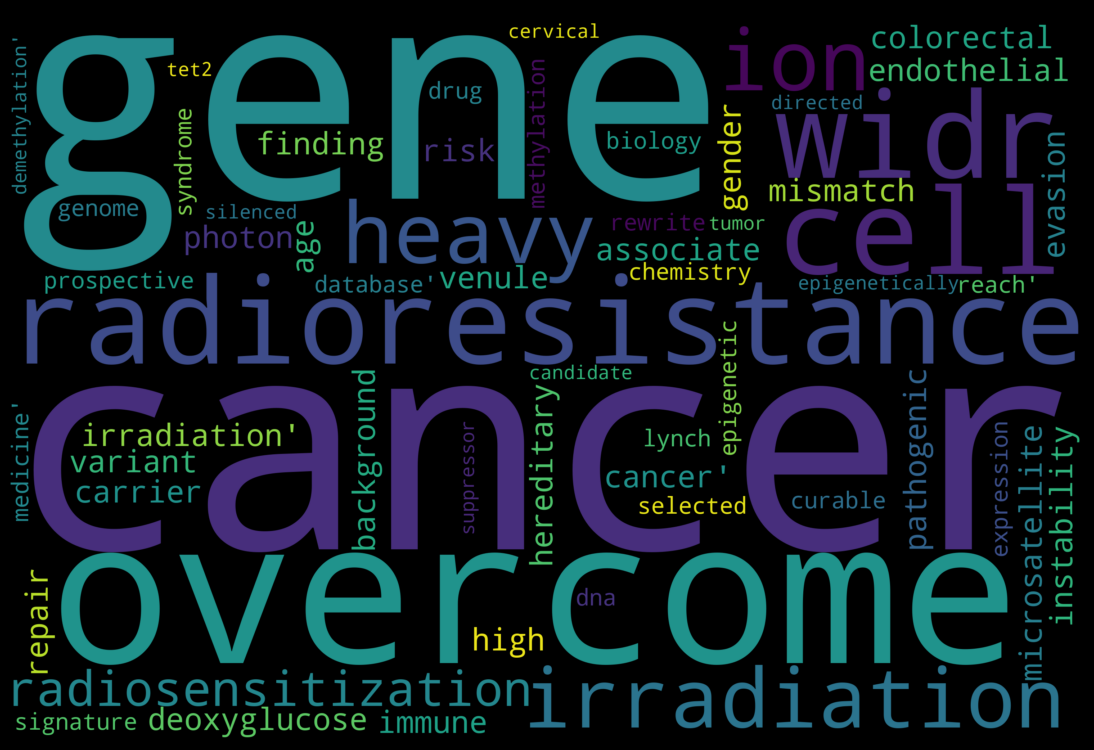

In [16]:
# WORDCLOUD FOR 'NO FIT'
text = combined_data[combined_data['target'] == 'no fit']['processed'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (15, 15),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title("'NO FIT' WORDCLOUD")
plt.tight_layout(pad=0)
plt.show()

In [18]:
# targetMap - WILL BE USED FOR ENCODING
targetMap = {'fit':1, 'no fit':0}
X = combined_data['processed']
y = combined_data['target'].map(targetMap)
del data_fit, data_no_fit, combined_data, text, processed, wordcloud  # FREE UP MEMORY

In [24]:
# CONVERTING THE TEXT DATA INTO VECTORS AND SAVIND DATA AS PICKLE
Xv = []
for i in tqdm.tqdm(range(len(X))):
    Xv.append(nlp(X[i]).vector.reshape(-1,300))

Xv = np.asarray(Xv).reshape(-1,300)

pickle_out = open("Xv", "wb")
pickle.dump(Xv, pickle_out)
pickle_out.close()

pickle_out = open("y", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

del i, pickle_out # FREE UP MEMORY

In [34]:
# NOW SINCE THE DATA IS IMBALANCED, THE ACCURACY AND OTHER PERFORMANCE METRICS WILL BE HINDERED, WE WOULD USE REPEATED EDITED NEAREST NEIGHBOUR TECHNIQUE TO UNDERSAMPLE OUR DATA. 
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
renn = RepeatedEditedNearestNeighbours()
X_renn, y_renn = renn.fit_sample(Xv,y)
print('Original Data : {}'.format(Counter(y)))
print('Under Sampled Data : {}'.format(Counter(y_renn)))

Original Data : Counter({0: 12023, 1: 4552})
Under Sampled Data : Counter({1: 4552, 0: 4262})


In [36]:
# SAVE DATA
pickle_out = open("X_renn", "wb")
pickle.dump(X_renn, pickle_out)
pickle_out.close()

pickle_out = open("y_renn", "wb")
pickle.dump(y_renn, pickle_out)
pickle_out.close()

del Xv, y, pickle_out,  # FREE UP MEMORY

In [37]:
# SPLIT THE DATA
X_train, X_test, y_train, y_test = train_test_split(X_renn, y_renn, test_size=0.15, stratify=y_renn, random_state=42) 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7491, 300)
(7491,)
(1323, 300)
(1323,)


In [38]:
# SUPPORT VECTOR MACHINE CLASSIFIER
from sklearn.svm import SVC
svc = SVC(gamma='scale', class_weight='balanced')
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
# PREDICTION
pred_tr = svc.predict(X_train)
pred_ts = svc.predict(X_test)

In [43]:
print("----------------------------------- TRAIN DATA METRICS ---------------------------")
print("Accuracy: {}".format(accuracy_score(y_train, pred_tr)*100))
print("F1-Score: {}".format(f1_score(y_train, pred_tr)*100))
print("Precision Score: {}".format(precision_score(y_train, pred_tr)*100))
print("Recall Score: {}".format(recall_score(y_train, pred_tr)*100))
print("ROC AUC SCORE: {}".format(roc_auc_score(y_train, pred_tr))) # Range is 0 to 1. Higher the better
print("----------------------------------- TEST DATA METRICS ---------------------------")
print("Accuracy: {}".format(accuracy_score(y_test, pred_ts)*100))
print("F1-Score: {}".format(f1_score(y_test, pred_ts)*100))
print("Precision Score: {}".format(precision_score(y_test, pred_ts)*100))
print("Recall Score: {}".format(recall_score(y_test, pred_ts)*100))
print("ROC AUC SCORE: {}".format(roc_auc_score(y_test, pred_ts))) # Range is 0 to 1. Higher the better

----------------------------------- TRAIN DATA METRICS ---------------------------
Accuracy: 85.88973434788413
F1-Score: 85.92730661696179
Precision Score: 88.6051619989017
Recall Score: 83.40656500387698
ROC AUC SCORE: 0.8597440342960276
----------------------------------- TEST DATA METRICS ---------------------------
Accuracy: 82.91761148904006
F1-Score: 82.61538461538461
Precision Score: 87.03403565640194
Recall Score: 78.62371888726209
ROC AUC SCORE: 0.8306185944363105


In [48]:
from sklearn.model_selection import cross_validate
rtr = cross_validate(svc, X_train, y_train, cv=10, scoring=['accuracy', 'f1','precision', 'recall', 'roc_auc'])
rts = cross_validate(svc, X_test, y_test, cv=10, scoring=['accuracy', 'f1','precision', 'recall', 'roc_auc'])

In [51]:
print("----------------------------------- CROSS VALIDATION AVERAGE SCORES ---------------------------")

print("----------------------------------- TRAIN DATA METRICS ---------------------------")
print("Accuracy: {}".format(statistics.mean(rtr['test_accuracy'])*100))
print("F1-Score: {}".format(statistics.mean(rtr['test_f1'])*100))
print("Precision Score: {}".format(statistics.mean(rtr['test_precision'])*100))
print("Recall Score: {}".format(statistics.mean(rtr['test_recall'])*100))
print("ROC AUC SCORE: {}".format(statistics.mean(rtr['test_roc_auc'])*100)) # Range is 0 to 1. Higher the better
print("----------------------------------- TEST DATA METRICS ---------------------------")
print("Accuracy: {}".format(statistics.mean(rts['test_accuracy'])*100))
print("F1-Score: {}".format(statistics.mean(rts['test_f1'])*100))
print("Precision Score: {}".format(statistics.mean(rts['test_precision'])*100))
print("Recall Score: {}".format(statistics.mean(rts['test_recall'])*100))
print("ROC AUC SCORE: {}".format(statistics.mean(rts['test_roc_auc'])*100)) # Range is 0 to 1. Higher the better


----------------------------------- CROSS VALIDATION AVERAGE SCORES ---------------------------
----------------------------------- TRAIN DATA METRICS ---------------------------
Accuracy: 82.04487761459724
F1-Score: 82.07874954855711
Precision Score: 84.7397244331636
Recall Score: 79.60671299085566
ROC AUC SCORE: 89.9050466412709
----------------------------------- TEST DATA METRICS ---------------------------
Accuracy: 78.99293688767372
F1-Score: 78.4758730123442
Precision Score: 83.00849232077779
Recall Score: 74.69735720375107
ROC AUC SCORE: 87.08163496376812


<Figure size 720x720 with 0 Axes>

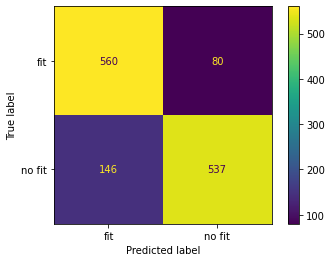

In [67]:
plt.figure(figsize = (10,10))
plot_confusion_matrix(svc, X_test, y_test, display_labels=targetMap, values_format="d")

In [70]:
# 560 IS TRUE POSTIVE
# 537 IS TRUE NEGATIVE
# 146 IS FALSE POSITIVE
# 80 IS FALSE NEGATIVE

In [72]:
# SAVE MODEL
import joblib
joblib.dump(svc, 'model_renn_svc_scale_balanced.pkl') 

['model_renn_svc_scale_balanced.pkl']

In [2]:
# TRAINING A SECOND MODEL 
# ARTIFICAL NEURAL NETWORK

import pickle
import numpy as np

pin = open(r'/media/gagandeep/2E92405C92402AA3/Work/Freelance/FIver/user_innazaimenko/Requirements/X_renn',"rb")
X_renn = pickle.load(pin)

pin = open(r'/media/gagandeep/2E92405C92402AA3/Work/Freelance/FIver/user_innazaimenko/Requirements/y_renn',"rb")
y_renn = pickle.load(pin)

del pin

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_renn, y_renn, test_size=0.15, stratify=y_renn, random_state=42) 
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers

model = Sequential()
model.add(Dense(256, input_shape=(300,), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


(7491, 300)
(7491,)
(1323, 300)
(1323,)
Using TensorFlow backend.
/home/gagandeep/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gagandeep/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gagandeep/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/gagandeep/

In [16]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, class_weight=class_weights)

Train on 7491 samples, validate on 1323 samples
Epoch 1/100
7491/7491 [==============================] - 2s 219us/step - loss: 0.0123 - accuracy: 0.9949 - val_loss: 1.2100 - val_accuracy: 0.8639
Epoch 2/100
7491/7491 [==============================] - 2s 228us/step - loss: 0.0132 - accuracy: 0.9948 - val_loss: 1.0660 - val_accuracy: 0.8639
Epoch 3/100
7491/7491 [==============================] - 2s 223us/step - loss: 0.0179 - accuracy: 0.9943 - val_loss: 1.0738 - val_accuracy: 0.8549
Epoch 4/100
7491/7491 [==============================] - 2s 223us/step - loss: 0.0123 - accuracy: 0.9957 - val_loss: 1.0773 - val_accuracy: 0.8624
Epoch 5/100
7491/7491 [==============================] - 2s 224us/step - loss: 0.0127 - accuracy: 0.9963 - val_loss: 1.0026 - val_accuracy: 0.8639
Epoch 6/100
7491/7491 [==============================] - 2s 222us/step - loss: 0.0134 - accuracy: 0.9957 - val_loss: 1.1176 - val_accuracy: 0.8534
Epoch 7/100
7491/7491 [==============================] - 2s 229us/step

In [17]:
pred_tr = model.predict_classes(X_train)
pred_ts = model.predict_classes(X_test)

In [18]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

print("----------------------------------- TRAIN DATA METRICS ---------------------------")
print("Accuracy: {}".format(accuracy_score(y_train, pred_tr)*100))
print("F1-Score: {}".format(f1_score(y_train, pred_tr)*100))
print("Precision Score: {}".format(precision_score(y_train, pred_tr)*100))
print("Recall Score: {}".format(recall_score(y_train, pred_tr)*100))
print("ROC AUC SCORE: {}".format(roc_auc_score(y_train, pred_tr))) # Range is 0 to 1. Higher the better
print("----------------------------------- TEST DATA METRICS ---------------------------")
print("Accuracy: {}".format(accuracy_score(y_test, pred_ts)*100))
print("F1-Score: {}".format(f1_score(y_test, pred_ts)*100))
print("Precision Score: {}".format(precision_score(y_test, pred_ts)*100))
print("Recall Score: {}".format(recall_score(y_test, pred_ts)*100))
print("ROC AUC SCORE: {}".format(roc_auc_score(y_test, pred_ts))) # Range is 0 to 1. Higher the better

----------------------------------- TRAIN DATA METRICS ---------------------------
Accuracy: 99.95995194233079
F1-Score: 99.9612152553329
Precision Score: 100.0
Recall Score: 99.92246058413026
ROC AUC SCORE: 0.9996123029206514
----------------------------------- TEST DATA METRICS ---------------------------
Accuracy: 85.94104308390023
F1-Score: 86.22222222222223
Precision Score: 87.25637181409296
Recall Score: 85.21229868228404
ROC AUC SCORE: 0.8596552434114202


In [19]:
model.save("model_renn_ann_dropout_weights.h5")

In [44]:
# PROCESSING THE 30K FILE
# IN THE DATASET THE AUTHOR AND TITLE ARE SEPERATED BY |. WE WILL SPLIT THE DATA AND SAVE FILE TO DISK. THAT FILE WILL BE USED FOR MAKING PREDICTIONS. DATA FROM ROW 22877-22906 WAS MANUALLY DELETED AS IT WAS AN ERROR MESSAGE. 
newdf= pd.read_csv("30K titles.csv", names=['title'])
newcol = newdf['title'].str.split("|", n=1, expand=True) # SPLIT THE DATA
newdf['author'] = newcol[0]
newdf['title'] = newcol[1] # THERE ARE SOME BLANK TITLE REOCRDS WHICH WILL BE DROPPED 
newdf = newdf[['author', 'title']] # REARRANGING COLUMNS
newdf = newdf[newdf['title'].isna() == False] # REMOVE NAN VALUES
newdf.to_excel("30K titles_processed.xlsx", index=False)

In [45]:
newdf.head(50)

,author,title
0,Susana Chuva de Sousa Lopes,The TGF? Family in Human Placental Development at the Fetal-Maternal Interface.
1,Susana Chuva de Sousa Lopes,Fast and efficient generation of knock-in human organoids using homology-independent CRISPR-Cas9 precision genome editing.
2,Susana Chuva de Sousa Lopes,"FoxD1-driven CCN2 deletion causes axial skeletal deformities, pulmonary hypoplasia, and neonatal asphyctic death."
3,Susana Chuva de Sousa Lopes,Early-Life Compartmentalization of Immune Cells in Human Fetal Tissues Revealed by High-Dimensional Mass Cytometry.
4,Susana Chuva de Sousa Lopes,Human blastocyst outgrowths recapitulate primordial germ cell specification events.
5,Susana Chuva de Sousa Lopes,Early divergence of mutational processes in human fetal tissues.
6,Susana Chuva de Sousa Lopes,Human iPSC-Derived Retinas Recapitulate the Fetal CRB1 CRB2 Complex Formation and Demonstrate that Photoreceptors and M�ller Glia Are Targets of AAV5.
7,Susana Chuva de Sousa Lopes,Variation in DNA methylation in the KvDMR1 (ICR2) region in first-trimester human pregnancies.
8,Susana Chuva de Sousa Lopes,Accelerating maturation of kidney organoids.
9,Susana Chuva de Sousa Lopes,"WNT Inhibition and Increased FGF Signaling Promotes Derivation of Less Heterogeneous Primed Human Embryonic Stem Cells, Compatible with Differentiation."
